1.)  First, import all of the libraries we might need.

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import export_graphviz
import graphviz
from sklearn import datasets


2.) Load the dataset

In [2]:
petrol_df = pd.read_csv("petrol_consumption.csv")
petrol_df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


3.)  Divide dataset into train and test sets

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(petrol_df.drop('Petrol_Consumption', axis=1), petrol_df['Petrol_Consumption'], test_size=0.2, random_state=122)


3.) First let's create our 'full tree' without restricting any of the hyperparameters.  We'll fit the tree using the train dataset.

In [4]:
full_tree = DecisionTreeRegressor(random_state=122)
full_tree.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=122, splitter='best')

4.)  Now we'll make some predictions with this full tree, and calculate MSE and R2 to get a baseline for how well it performed.

In [5]:
predictions = full_tree.predict(X_test)

In [6]:
mean_absolute_error(Y_test,predictions)

90.9

In [7]:
r2_score(Y_test,predictions)

-0.007822817405810145

It's no suprise that the MSE is quite high, while the r2 value is quite low (and is actually negative!).  This tree isn't very accurate as is.  Next we want to prune the tree by seeing if we can find an ideal combination of hyperparameter values which will create a more accurate tree.

5.)  Next, I'll use Gridsearch to find the optimal number of hyperparameters to use in my decision
tree.  Will try out several different combinations.  Will use 10 folds for cross validation.

In [8]:
param_grid = [{"max_features":[None,1,2,3],"max_depth":[3, 4, 5, 6,7,8,None],"min_samples_split":[2,3,4,5]}]
gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=123), param_grid = param_grid, cv=10)

6.)  Now, will fit the data on the train set, and print out the different combinations that Gridsearch has tried...(note since there were so many different combinations I commented this step out for purposes of submitting assignment.)

In [9]:
gs.fit(X_train, Y_train)
#gs.cv_results_['params']  

C:\Users\Todd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=123, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_features': [None, 1, 2, 3], 'max_depth': [3, 4, 5, 6, 7, 8, None], 'min_samples_split': [2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

...and will print the best hyperparameter combination.

In [10]:
gs.best_params_

{'max_depth': 3, 'max_features': 1, 'min_samples_split': 3}

From the output, it looks like the best combination of hyperparameters to use is a tree with max depth = 3, maximum features = 1, and minimum samples required for any split to be 3.  

7.)  Now we can use these hyperparameter values to create a new 'pruned' tree.  Let's also visualize this as now the tree will be a reasonable size that we can look at.

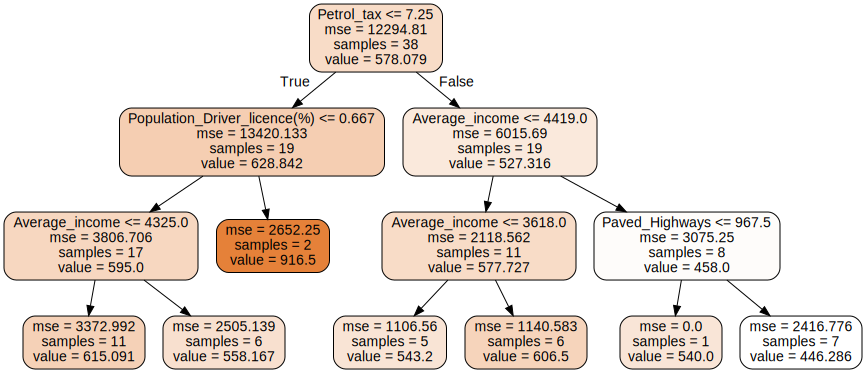

In [11]:
cut_tree = gs.best_estimator_
dot_data = export_graphviz(cut_tree, filled=True, rounded=True, feature_names=X_train.columns, out_file=None)
graphviz.Source(dot_data)

8.)  Now we'll look at how well this new pruned tree does on the test dataset.

In [12]:
predictions = cut_tree.predict(X_test)

In [13]:
mean_absolute_error(Y_test,predictions)

74.65467532467531

In [14]:
r2_score(Y_test,predictions)

0.30006179800338983

As we can see, the mean absolute error is much lower, where the R2 value is much higher (although at 0.3 not so high as to call this tree super accurate.)  This pruned tree is definitely an improvement from the full tree.  Given the small number of records in the dataset, as well as the small number of predictors, I think my original gridsearch tested a comprehensive # of combinations of hyperparameters.  Therefore I would stop here and use this model.  